In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse, Element

In [2]:
def crop_image_to_mask(img, box):
    new_img = img[box[1]:box[1]+box[3],box[0]:box[0]+box[2]]
    
    return new_img

In [62]:
bg_img_path = './background/1.jpg'
image_path = './image_0429/agree_0001.jpg'
xml_path = './xml_0430/agree_0001.xml'
save_path = './result/'

dom = parse(xml_path)
root = dom.getroot()
x = int(root[6][4][0].text)
y = int(root[6][4][1].text)
w = int(root[6][4][2].text)-x
h = int(root[6][4][3].text)-y
box = (x, y, w, h)
print(box)

f = cv2.imread(image_path, cv2.IMREAD_COLOR)
result = crop_image_to_mask(f, box)

position_top_left=(100,300)
bg = cv2.imread(bg_img_path, cv2.IMREAD_COLOR)
bg[position_top_left[1]:position_top_left[1]+result.shape[0],position_top_left[0]:position_top_left[0]+result.shape[1]] = result

(366, 400, 385, 160)


Text(0.5, 1.0, 'BackGround')

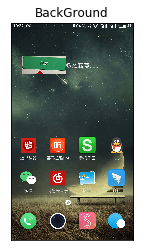

In [63]:
# plt.figure()
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.xticks([]), plt.yticks([])
# plt.title('corp_image')
plt.figure()
plt.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('BackGround')